<div class = "alert alert-info" style="border-left: 7px solid blue">
<h>Описание проекта</h>
</div>

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

#  Шаг Общая информация


## Загрузка данных

Импортирую библиоткеи

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

Загружаю датасеты

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [3]:
orders = pd.read_csv('orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
visitors = pd.read_csv('visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Загружены три датасета:
1) Гипотезы. Содержит описание гипотезы, охват пользователей, влияние, уверенность в гипотезе, затраты ресурсов на проверку, все по 10-бальной шкале;

2) Заказы. Содержит идентификатор заказа, идентификатор пользователя, дата заказа, выручка и группа А/В теста;

3) Пользователи. Содержит дату, группу А/В теста и количество пользователей

## Предобработка данных

Рассмотрю подробнее данные, применив info()

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков нет. Количественные данные типа int. Изменение типа данных не потребуется. Регистр в названиях колонок таблицы гипотез лучше изменить.

Изменение регистра в названия колонок

In [8]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


## Общий вывод по шагу 1

Данные представлены в трех таблицах, не имеют пропусков, изменения типа данных не требуется. В предобработке данных:
- Изменен регистр названия колонок

Данные готовы к дальнейшему анализу

# Шаг Приоритизация гипотез

Применю фреймворк ICE для приоритизации

In [9]:
hypothesis['ICE'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'])
hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


После применения ICE можно сказать, что наиболее перспективные гипотезы 8,0, 7 и 6

In [10]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее приоритетные гипотезы по RICE - 7,2,0 и 6

## Общий вывод по шагу 2

Применение фреймворка ICE показало, что приоритетные гипотезы 8,0, 7 и 6. При применении RICE в лидерах также 7,0,6, а на второе место вышла гипотеза 2. 8-ая гипотеза при этому ушла на 5-ое место. Это происходит из-за того, что при применении RICE тажке учитывается параметр Reach - охват аудитории: у 2ой гипотезы он 8, а у 8-ой - 1. Это и повлияло на изменение мест в списке.

# Шаг Анализ А/В теста

## График кумулятивной выручки по группам

Собираю кумулятивные данные по таблицам заказы и пользователи

In [11]:
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


Разделю данные по группам, сохраняю в переменных cumulativeRevenueA и cumulativeRevenueB и оставляю три столбца: дата, выручка, заказы

In [12]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Строю график кумулятивной выручки по группам

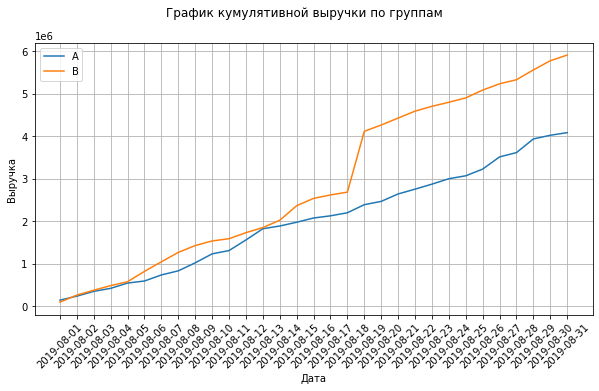

In [13]:
plt.figure(figsize = (10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.suptitle("График кумулятивной выручки по группам")
plt.legend()
plt.grid()
plt.show()

Сначала обе группы идут относительно вровень, затем группа В начинает лидировать, а в середите теста резкий скачок и также продолжает лидировать группа В. Возможно наличие аномально большых заказов, которые влияют на результаты.

## График среднего чека по группам

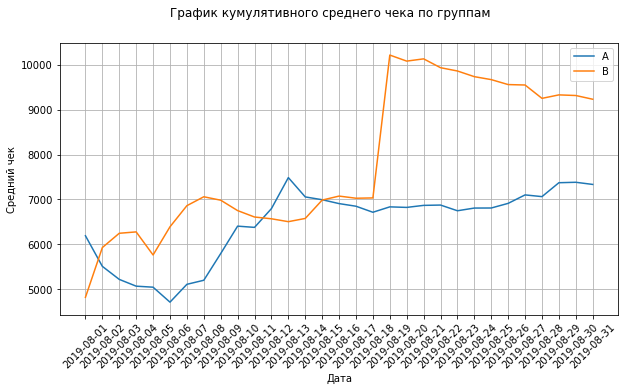

In [14]:
plt.figure(figsize = (10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.suptitle("График кумулятивного среднего чека по группам")
plt.legend() 
plt.grid()
plt.show()

По графику среднего чека также налицо резкий скачок в середине теста в группе В. Лидерство сохраняется, хотя дальше показатель по В снижается

## График относительного изменения кумулятивного среднего чека группы В к А

Для построения графика относительного изменения кумулятивного среднего чека объединяю таблицы с помощью merge() и оставляю столбцы дата, выручка по А и В и заказы по А и В

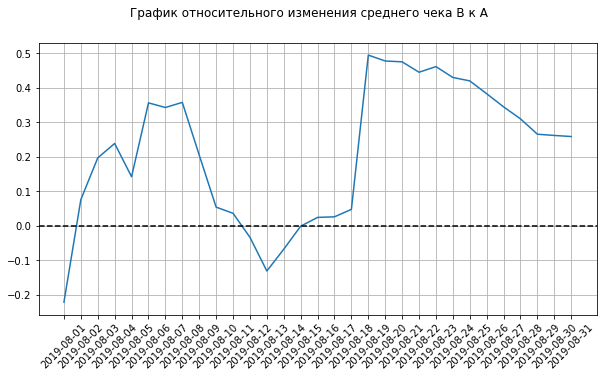

In [15]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим график
plt.figure(figsize = (10,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.grid()
plt.suptitle("График относительного изменения среднего чека В к А")
plt.show()

Результаты теста менялись на проятежнии теста в несколько дат. Сохраняется предположение об аномально большых покупках в эти даты, например, 17 августа

## График кумулятивной конверсии по группам

Для построения графика сначала рассчитаю конверсию как соотношение заказов к пользователям и добавляю столбец к таблице кумулятивных данных

In [16]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Снова делю группы, сделав срезы, и строю график

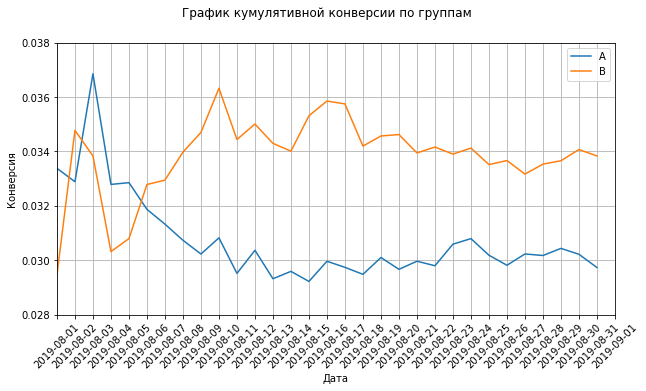

In [17]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize = (10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.suptitle("График кумулятивной конверсии по группам")

plt.axis(["2019-08-01","2019-09-01",0.028, 0.038])
plt.grid()
plt.show()

По конверсии сначала группа В снижалась, а А росла, однако потом симметричные изменения - В растет, А падает и фиксируются в районе 0.028 (для А) и 0.034(для В)

## График относительного изменения кумулятивной конверсии группы В к группе А

По аналогии со средним чеком объединяю таблицы с конверсией так, чтобы итоговая таблица содержала дату, конверсию А и конверсию В, задав suffixes

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

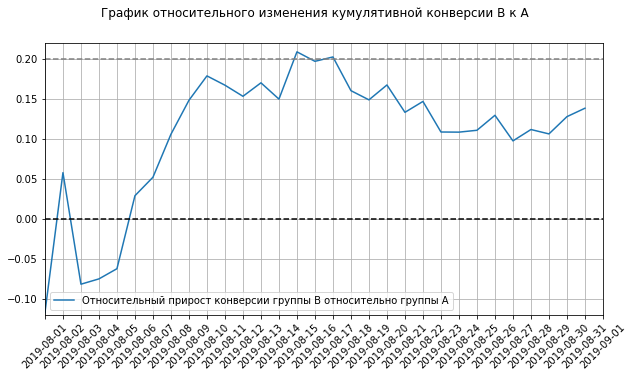

In [19]:
plt.figure(figsize = (10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.suptitle("График относительного изменения кумулятивной конверсии В к А")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01","2019-09-01",-0.12, 0.22])
plt.show()

С самого начала теста можно зафиксировать резкий скачок по группе В и падение относительно А примерно на 7%, однако затем следует рост, который достигает в середине теста прироста в 20%, фиксируется на 15%. Можно заключить вывод о лидерстве группы В по показателю кумулятивной конверсии

## Точечный график количества заказов по пользователям

Для построения графика рассчитываю количество заказов. Для этого сгруппирую данные из таблицы заказы по пользователю, создаю датафрейм с двумя колонками: идентификатором пользователя и количеством заказов, сохраняю в переменной ordersByUsers

In [20]:
ordersByUsers  = (
    orders.groupby('visitorId', as_index=False) #сгруппирует заказы по пользователям
    .agg({'transactionId' : 'nunique',}))
ordersByUsers.columns = ['userId', 'orders']    
    
ordersByUsers.sort_values(by='orders',ascending=False)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


Построю график по этим данным. Для графика нужны данные по оси X и Y. В переменной x_values сохраняю серию количества наблюдений

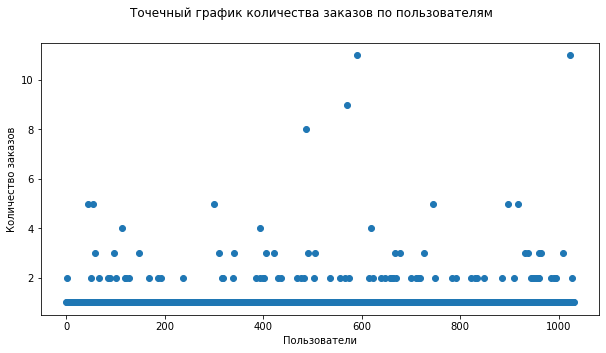

In [21]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.suptitle("Точечный график количества заказов по пользователям")
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Пользователей, заказавших более 2х раз, меньше. Однако, чтобы посчитать, какое количество заказов считать нормальным и большим, расссчитаем перцентили

## 95-й и 99-й перцентили количества заказов

Для расчета перцентилей буду использовать встренный в библиотеку numpy метод дял расчета перцентилей

In [22]:
np.percentile(ordersByUsers['orders'], [95,99])

array([2., 4.])

Больше 2х заказов совершали не более 5% пользователей (95 перцентиль = 2) и больше 4 заказов совершали не более 1% пользователей. Границей предположительно можно считать количество заказов 3 и более

## Точечный график стоимостей заказов

In [23]:
orders.sort_values(by='revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


Среди самых крупных стоимостей есть заказы в районе 80-95т, однако явно выбивается заказ на более, чем 1млн

Построю график, снова задав по оси x номера наблюдений

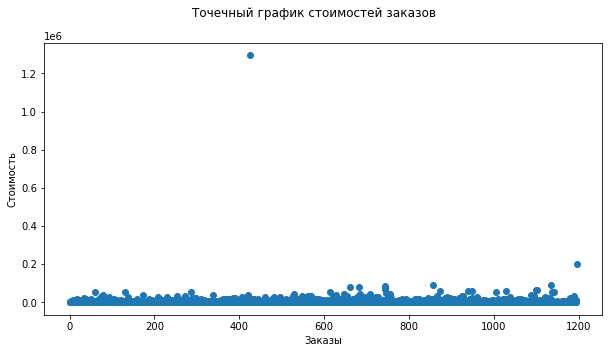

In [24]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.suptitle("Точечный график стоимостей заказов")
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.show()

На графике также можно увидеть выбивающийся заказ в более, чем 1 млн и 200т. Большинство заказов не превышает 40т

## 95-й и 99-й перцентили стоимостей заказов

Вновь применяю медом np.percentile() для расчета перцентилей

In [25]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не больше 5% пользователей сделали заказ более 28т и не больше 1% пользователей совершили заказ более 58т. Обозначив границу на 99-м перцентиле при дальнейшем срезе можно будет убрать не более 1% пользователей с крупными заказами

Сохраним значение 99 перцентиля в переменной для дальнейшего среза и расчетов

In [26]:
rev_99_percentile = 58234


## Статистическая значимость различий в конверсии по "сырым" данным

Посчитаю статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей.

Гипотезы:
- Нулевая: различий в конверсии между группами нет.
- Альтернативная: различия в конверсии между группами есть.

Готовлю данные

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

Сохраняю в двух переменных ordersByUserA и ordersByUserB данный из таблицы заказов, где для пользователей, совершивших хотя бы 1 заказ, будет указано количество заказов

In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Создаю переменные для статистического теста sampleA и sampleB, в которых будет указано для пользователя совершивших заказ - количество заказов, а для пользователей без заказов - нули.

In [29]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Применяю тест Манна-Уитни для расчета статистической значимости

In [30]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Первое число — p-value = 0.017 меньше 0.05. Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Выигрыш группы B равен 13.8% — второе число в выводе.

## Статистическая значимость различий в среднем чеке заказа по "сырым" данным

Применяю тест Манна-Уитни к столбцу revenue - данным о стоимости заказа

In [31]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value (первое значение) = 0.729. Это больше 0.05. Нулевую гипотезу не отвергаем. Нет оснований считать, что в среднем чеке есть различия. Однако относительное различие среднего чека по сегментам - 25% в пользу группы В. Нужен анализ без аномальных данных.

## Статистическая значимость различий в конверсии по "очищенным" данным

Сделаю срезы пользователей с числом заказов больше 2 и стоимостью заказа больше 30т

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > rev_99_percentile]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head()


1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64

In [33]:
abnormalUsers.shape

(31,)

Таких пользователей (с заказами больше 2 и стоимостью больше 58т) - 31

Сохраняю данные для статистического теста в переменных sampleAFiltered и sampleBFiltered, убрав при этом аномальные данные метедом isin() применительно к ранее сохраненным abnormalUsers

In [34]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Тест Манна-Уитни

In [35]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.010
0.174


По очищенным данным p-value (0.010) меньше, чем 0.017(по сырым) и меньше 0.05 (статистически значимое)
То есть, подтверждается,что нулевую гипотезу отвергаем. Различия в конверсии есть. Выигрыш группы B по очищенным данным равен 17% 

##  Статистическая значимость различий в среднем чеке заказа по "очищенным" данным

Применяем тест Манна-Уитни к очищенным данным по среднему чеку

In [36]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.798
-0.020


P-value = 0.798, увеличилась 0.07. Относительно различие среднего чека уменьшилось до -2%. И хотя это не меняет общих выводов, такие различия показывают, как влияют аномалии на результаты теста.

# Общий вывод 

Результаты теста:
- Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий (в сторону улучшения показателей группы В). Выигрыш - 20%;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, относительное различие между группами менее 1% ;
- График различия конверсии показывает лидерство группы B. И хотя во время теста была "просадка" на 5%, тем не менее есть тенденция к улучшению
- На графике различий среднего чека по группам также можно констатировать выигрышное положение группы B. Присутсвовал момент падения среднего чека, ниже А, однако относительно быстро восстановился и закрепился в лучшей позиции относительно показателя группы А

Решение:
- Тест следует остановить и признать его успешным для группы В

Несмотря на отсутсвие статистически значимого различия в среднем чеке, сегмент B не проигрывает в этом А, а по конверсии В в выигрыше. График конверсии показывает уверенное лидерство В, а график среднего чека показывает скачки, однако есть тенденция к "успокоению" графика, где по-прежнему у В сохраняются лидирующая позиция.